In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import glob
import os
import tables as tb

from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as m3d
import math
from matplotlib import image
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:

datfiles='./reconstructedAngularDistrMuonFlux-mss-LAB2400-finalNumbers.csv'

In [3]:
MuonMeas = pd.read_csv(datfiles, delimiter=',',header=None).values
muon_data=pd.DataFrame(data=MuonMeas, columns=["gamma", "alpha","flux"])
muon_data=muon_data[muon_data.alpha<80]


cols = [ 'alpha', 'gamma','flux']
muon_data = muon_data[cols]


for Gs in muon_data.gamma.unique():
    avg=muon_data[(muon_data.alpha<=4) & (muon_data.alpha>=1) & (muon_data.gamma==Gs)].flux.mean()
    muon_data['flux'].loc[(muon_data.gamma==Gs) & (muon_data.alpha<=4)]=avg

muon_data['gamma']=muon_data['gamma'].map(lambda gamma: (gamma)%360*np.pi/180)  

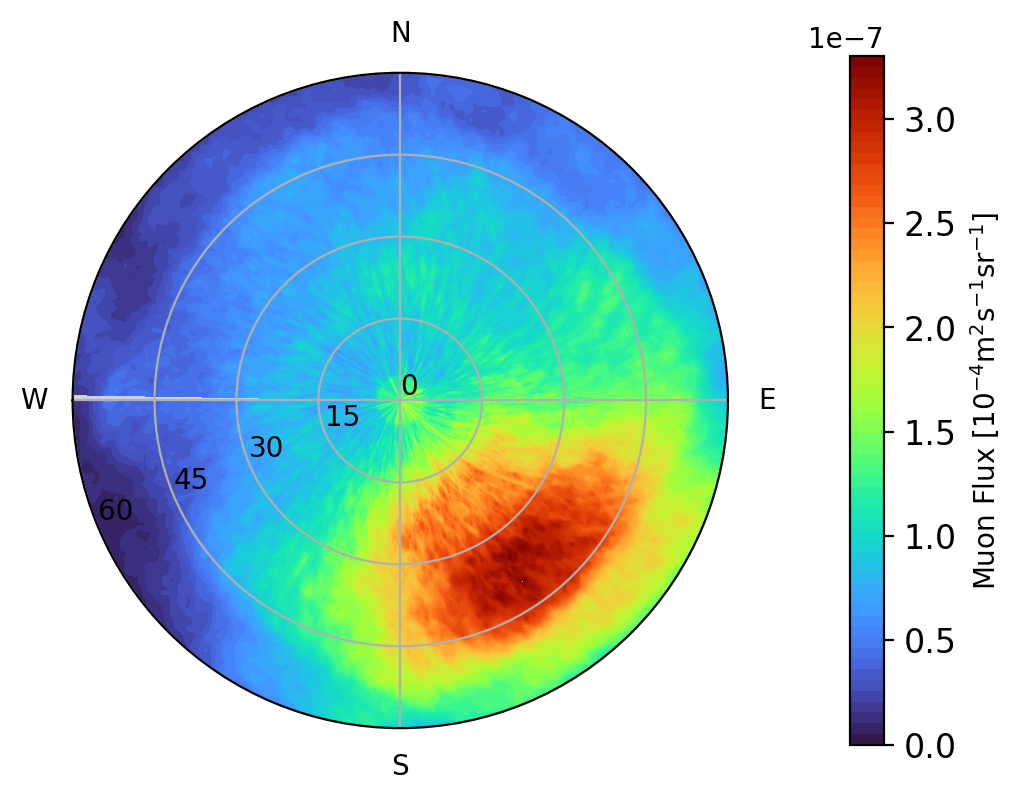

In [10]:
rmu, alphamu = np.meshgrid(muon_data.alpha.unique(), muon_data.gamma.unique())

valuesmu=np.array(muon_data.flux/10**4)
valuesmu = valuesmu.reshape(len(muon_data.gamma.unique()), len(muon_data.alpha.unique()))
 


fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),figsize=(5,5),dpi=200,constrained_layout=True)
fig.patch.set_facecolor('white')
levels=np.linspace(0,3.3e-7,65)


im=ax.contourf(alphamu, rmu, valuesmu,levels=levels, cmap=plt.cm.turbo)



#to put north on top
ax.set_theta_zero_location("W")
ax.set_theta_direction(1)
ax.set_rlim(0,60)
ax.set_rticks([0,15,30,45,60])


cb=fig.colorbar(im, shrink=0.7,ticks=np.arange(0,3.5e-7,5e-8))

ax.set(facecolor = "lightgrey",alpha=0.2)
cb.set_label("Muon Flux [10$^{-4}$m$^{2}$s$^{-1}$sr$^{-1}$]")

cb.ax.tick_params(labelsize=12)
ax.set_thetagrids([0,90,180,270],['W','S','E','N'])
plt.show()